## Life Expectancy Analysis

First 5 rows of dataset:
       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         G

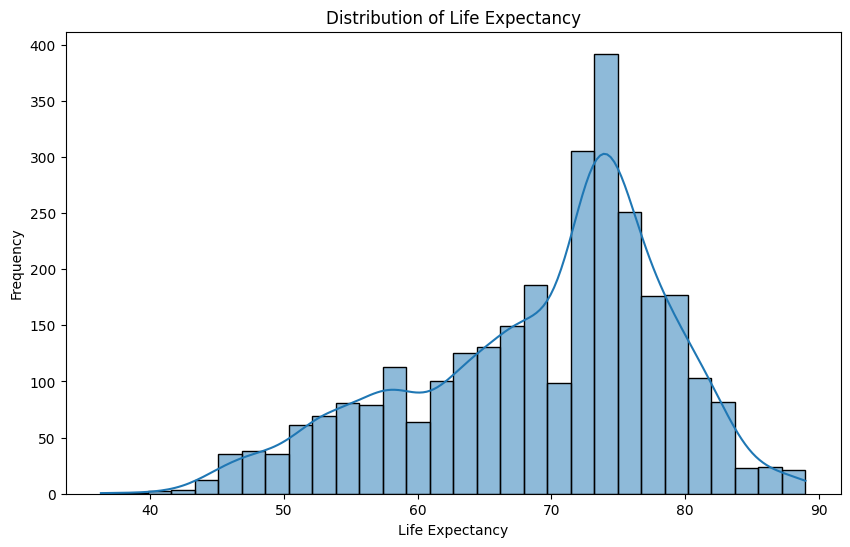

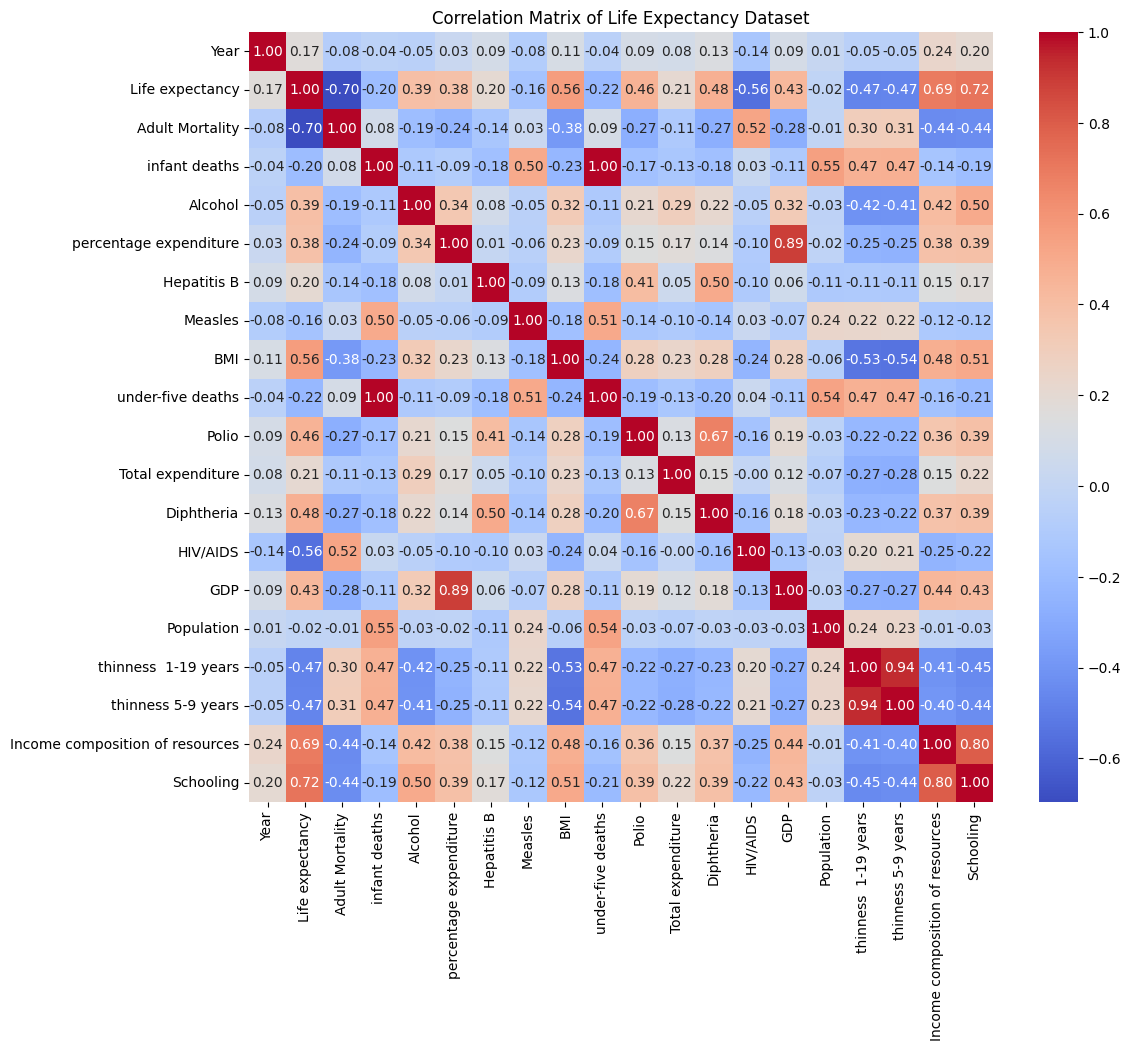

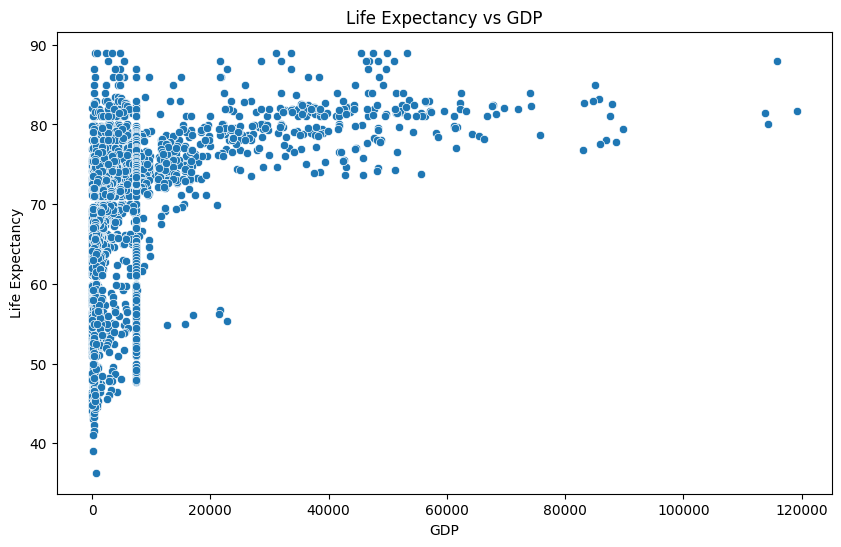


Pearson Correlation between GDP and Life Expectancy: 0.43

T-test Result:
t-statistic = 51.12, p-value = 0.0000
There is a statistically significant difference in life expectancy between high and low income countries.

Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     1113.
Date:                Thu, 26 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:37:11   Log-Likelihood:                -9668.4
No. Observations:                2938   AIC:                         1.934e+04
Df Residuals:                    2934   BIC:                         1.937e+04
Df Model:                           3                                         
Covariance Type:            nonrobust      

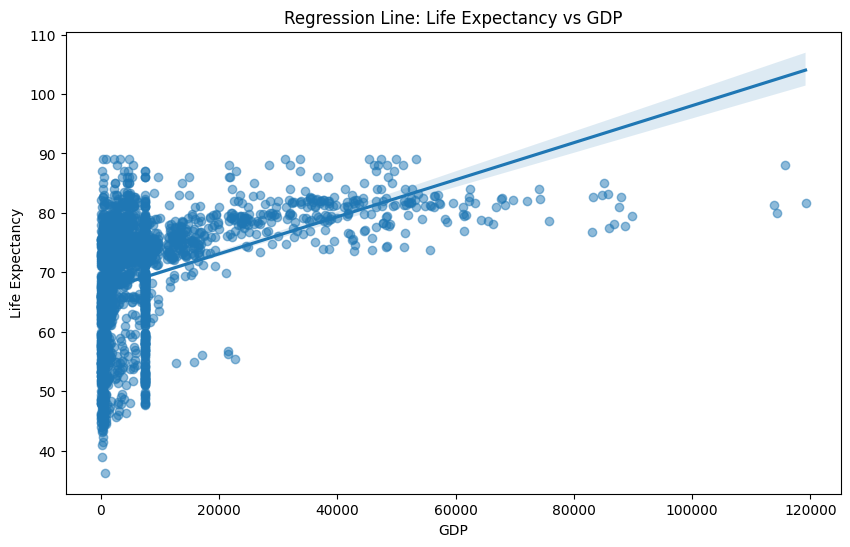

In [ ]:
# ----------------------------------------
# Life Expectancy Analysis Project - Internship
# Full Working Code
# ----------------------------------------

# Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = "/content/Life Expectancy Data.csv"  # <-- Replace with your correct path if different
df = pd.read_csv(file_path)

# Preview data
print("First 5 rows of dataset:")
print(df.head())

# Check column names (fix if any extra spaces)
df.columns = df.columns.str.strip()

# Quick info
print("\nDataset Information:")
print(df.info())

# Handle missing values (using mean imputation for numeric columns)
# Clean column names

numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Handle duplicates
df.drop_duplicates(inplace=True)


# Check for duplicates
df.drop_duplicates(inplace=True)

# ---------------- EDA ----------------

# Distribution of Life Expectancy
plt.figure(figsize=(10, 6))
sns.histplot(df['Life expectancy'], bins=30, kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
# Select numeric columns only for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Life Expectancy Dataset')
plt.show()

# Scatter plot: Life Expectancy vs GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Life expectancy', data=df)
plt.title('Life Expectancy vs GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

# ---------------- Statistical Analysis ----------------

# Pearson Correlation between GDP and Life Expectancy
gdp_corr, _ = stats.pearsonr(df['GDP'], df['Life expectancy'])
print(f"\nPearson Correlation between GDP and Life Expectancy: {gdp_corr:.2f}")

# Check income column exists (if not skip T-test)
if 'Income composition of resources' in df.columns:
    # Use this column as proxy for income classification
    median_income = df['Income composition of resources'].median()
    high_income = df[df['Income composition of resources'] >= median_income]['Life expectancy']
    low_income = df[df['Income composition of resources'] < median_income]['Life expectancy']

    t_stat, p_value = stats.ttest_ind(high_income, low_income)

    print(f"\nT-test Result:")
    print(f"t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print("There is a statistically significant difference in life expectancy between high and low income countries.")
    else:
        print("No statistically significant difference found between income groups.")
else:
    print("\nIncome classification column not found. Skipping T-test.")

# ---------------- Regression Analysis ----------------

# Select features (modify depending on availability in your data)
features = ['GDP', 'Total expenditure', 'Schooling', 'Adult mortality']
features = [f for f in features if f in df.columns]

X = df[features]
y = df['Life expectancy']

# Handle missing values again for regression safety
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Add constant to regression (intercept)
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# Print regression summary
print("\nRegression Model Summary:")
print(model.summary())

# Visualize regression for GDP
if 'GDP' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.regplot(x='GDP', y='Life expectancy', data=df, scatter_kws={'alpha':0.5})
    plt.title('Regression Line: Life Expectancy vs GDP')
    plt.xlabel('GDP')
    plt.ylabel('Life Expectancy')
    plt.show()
